In [4]:
#pip install nltk
#pip install PyPDF2

In [23]:
from PyPDF2 import PdfReader
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicogonzalez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicogonzalez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nicogonzalez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Fox news article focuses more on the accusations of plagiarism from Claudine Gray 
and also brings citations from the washington free beacon. This article seems to be more agrresive
towards the issue. 

Reuters articles focuses more on bringing out the simple facts of what had happended, 
also talks with more clarity about Harvards protests in the Israel-Hammas war and Claudine Gray
testimony on the issue. This article brings more direct exposure to the facts. about what had happened
also giving less subjective opinion. 

In [16]:
foxpdf_file_path = '/Users/nicogonzalez/Desktop/BABSON COLLEGE/Clasess/SPRING 2024/Advanced Programming /Assignment 1 AP/foxnews.pdf'

foxnews_reader = PdfReader(foxpdf_file_path)
foxnews_pages = len(foxnews_reader.pages)
foxnews_text = ''

for page in range(foxnews_pages):
    text = foxnews_reader.pages[page].extract_text()
    foxnews_text += text
    
print(foxnews_text)
    


1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

In [22]:
Reuterspdf_file_path = '/Users/nicogonzalez/Desktop/BABSON COLLEGE/Clasess/SPRING 2024/Advanced Programming /Assignment 1 AP/Reutersnews.pdf'

Reutersnews_reader = PdfReader(Reuterspdf_file_path)
Reutersnews_pages = len(Reutersnews_reader.pages)
Reutersnews_text = ''

for page in range (Reutersnews_pages):
    text = Reutersnews_reader.pages[page].extract_text()
    Reutersnews_text += text
    
print(Reutersnews_text)

1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Rights
Dec 21 (Reuters) - Harvard University's president was planning to submit three corrections to
her 1997 dissertation after a committee investigating plagiarism allegations against her found
that she had made citation errors, a university spokesperson said.
Claudine Gay , who was inaugurated as Harvard's president in September , has already
submitted corrections to two published articles in recent weeks that were the focus of a
review by the Harvard Corporation, the university's governing boa

After extracting all the text, the foxnews article has some links, dates and wrong spacing in some words as well as an NFL advertisement that I dont need and can affect the sentiment analysis. Furthermore, in the Reuters text there is also some links and wrong spacing that I would need to fix.

In [24]:
sia = SentimentIntensityAnalyzer()

# Get the sentiment scores
foxsentiment_scores = sia.polarity_scores(foxnews_text)

print(foxsentiment_scores)

{'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}


In [25]:
reuterssentiment_scores = sia.polarity_scores(Reutersnews_text)

print(reuterssentiment_scores)

{'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


Foxnews article has a 0.7243 scores vs a -0.9719 for Reuters. I interpret that python detects a more negative message in the Reuters article than the Foxnews one, which I do not necesary agree with since I believe that Reuters is more objective than Foxnews which is constanly bringing and citing other news and students in a way that makes the problem look bigger.  

In [26]:
fox_headline = 'Embattled Harvard University President Claudine Gay hitwith more plagiarism charges'
reuters_headline = 'Harvard president will submit dissertation edits afterplagiarism allegations'

fox_headline_sentiment_score = sia.polarity_scores(fox_headline)

print(fox_headline_sentiment_score)




{'neg': 0.209, 'neu': 0.791, 'pos': 0.0, 'compound': -0.3353}


In [27]:
reuters_headline_sentiment_score = sia.polarity_scores(reuters_headline)

print(reuters_headline_sentiment_score)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


The sentiment analysis for the headlines does not agree with the overall sentiment analysis for each article. Foxnews headline scored -0.353 while the full article score was 0.7243. Moreover, Reutersnews headline scored 0.0 and teh full article was -0.917.

In [28]:
pip install py-readability-metrics

Note: you may need to restart the kernel to use updated packages.


In [29]:
from readability import Readability

In [31]:
fk_fox = Readability(foxnews_text).flesch_kincaid()

gfi_fox = Readability(foxnews_text).gunning_fog()

print(fk_fox)
print(gfi_fox)

score: 19.21912993097889, grade_level: '19'
score: 21.868487077434633, grade_level: 'college_graduate'


In [37]:
fk_reuters = Readability(Reutersnews_text).flesch_kincaid()

gfi_reuters = Readability(Reutersnews_text).gunning_fog()

print(fk_reuters)
print(gfi_fox)

score: 18.706800340389325, grade_level: '19'
score: 21.868487077434633, grade_level: 'college_graduate'


Both the Flesch-Kincaid Grade Level and the Gunning Fog Index are readability tests designed to provide an estimate of the educational level required to understand a particular piece of text. Lower scores indicate easier readability, while higher scores indicate more complex or difficult-to-read text.

Therefore, even thought both scores are very similar,  Reuters seem a little less complex

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

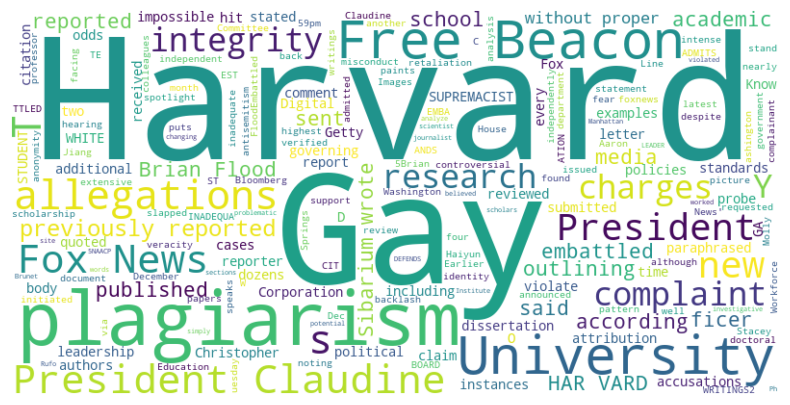

In [45]:

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(foxnews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

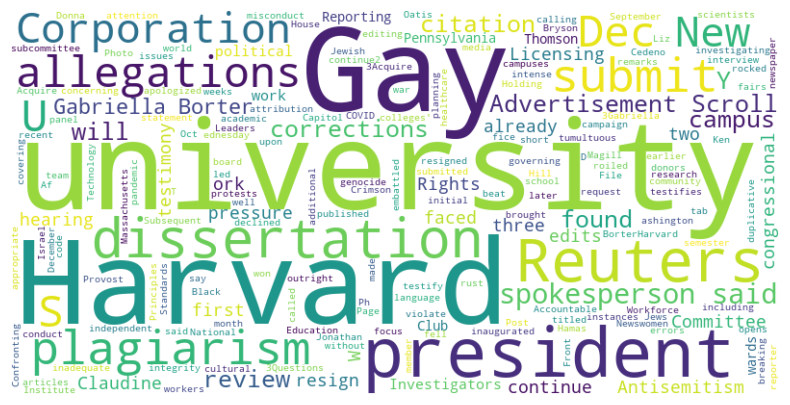

In [44]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(Reutersnews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In the foxnews workcloud we can see as mentioned before the amount of times that they cite other sources such as free beacon, also as discussed before foxnews uses more negative messages as you can see the word plagiarism bigger than in Reuters article